In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/heat-waves-2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heat-waves-2/Data/January_to_March_2019.csv
/kaggle/input/heat-waves-2/Data/Oct_to_Dec_2019.csv
/kaggle/input/heat-waves-2/Data/August_2021.csv
/kaggle/input/heat-waves-2/Data/July_2021.csv
/kaggle/input/heat-waves-2/Data/July_to_Sept_2019.csv
/kaggle/input/heat-waves-2/Data/June_2022.csv
/kaggle/input/heat-waves-2/Data/September_2021.csv
/kaggle/input/heat-waves-2/Data/December_2021.csv
/kaggle/input/heat-waves-2/Data/August_2022.csv
/kaggle/input/heat-waves-2/Data/April_to_June_2019.csv
/kaggle/input/heat-waves-2/Data/May_2021.csv
/kaggle/input/heat-waves-2/Data/April_to_June_2020.csv
/kaggle/input/heat-waves-2/Data/June_2021.csv
/kaggle/input/heat-waves-2/Data/May_2022.csv
/kaggle/input/heat-waves-2/Data/April_2022.csv
/kaggle/input/heat-waves-2/Data/February_2022.csv
/kaggle/input/heat-waves-2/Data/March_2022.csv
/kaggle/input/heat-waves-2/Data/October_to_December_2020.csv
/kaggle/input/heat-waves-2/Data/October_2021.csv
/kaggle/input/heat-waves-2/Data/April_2021.csv


# Data Loading and Refining

In [54]:
dfs = []
for file in filenames:
    if file.endswith(".csv"):
        file_path = os.path.join(dirname, file)
        print(file_path)
        
        csv_reader =pd.read_csv(file_path,encoding='latin1',names = ['District','Mandal','Date','Rain','Min_Temp','Max_Temp','Min_Humidity','Max_Humidity','Min_Wind_Speed','Max_Wind_Speed'], low_memory=False, chunksize=10000)



        # Loop through each chunk of data and filter the rows with 'Adilabad' and 'Warangal' values
        dfs_filtered = []
        for chunk in csv_reader:
            
#             district_filter = chunk['District'].isin(['Adilabad','Nizamabad', 'Warangal', 'Karimnagar','Khammam'])
#             district_filter = chunk['District'].fillna('').str.contains('(Adilabad|Nizamabad|Warangal|Karimnagar|Khammam).*')
                
            mandal_filter = chunk['Mandal'].fillna('').str.contains('(Adilabad|Nizamabad|Warangal|Karimnagar|Khammam).*')
            df_filtered = chunk[mandal_filter]
            dfs_filtered.append(df_filtered)

        # Concatenate the filtered DataFrames into a single DataFrame
        df_filtered = pd.concat(dfs_filtered)
        df_filtered = df_filtered.drop("District", axis = 1)
    

#     result = []
#     for chunk in csv_reader:
#         result.append(chunk)
#     df = pd.concat(result, ignore_index=True)
    dfs.append(df_filtered)

#     print(dfs.append(pd.read_csv(file)))

/kaggle/input/heat-waves-2/Data/January_to_March_2019.csv
/kaggle/input/heat-waves-2/Data/Oct_to_Dec_2019.csv


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


/kaggle/input/heat-waves-2/Data/August_2021.csv
/kaggle/input/heat-waves-2/Data/July_2021.csv
/kaggle/input/heat-waves-2/Data/July_to_Sept_2019.csv
/kaggle/input/heat-waves-2/Data/June_2022.csv
/kaggle/input/heat-waves-2/Data/September_2021.csv
/kaggle/input/heat-waves-2/Data/December_2021.csv
/kaggle/input/heat-waves-2/Data/August_2022.csv
/kaggle/input/heat-waves-2/Data/April_to_June_2019.csv
/kaggle/input/heat-waves-2/Data/May_2021.csv
/kaggle/input/heat-waves-2/Data/April_to_June_2020.csv
/kaggle/input/heat-waves-2/Data/June_2021.csv
/kaggle/input/heat-waves-2/Data/May_2022.csv
/kaggle/input/heat-waves-2/Data/April_2022.csv
/kaggle/input/heat-waves-2/Data/February_2022.csv
/kaggle/input/heat-waves-2/Data/March_2022.csv
/kaggle/input/heat-waves-2/Data/October_to_December_2020.csv
/kaggle/input/heat-waves-2/Data/October_2021.csv
/kaggle/input/heat-waves-2/Data/April_2021.csv
/kaggle/input/heat-waves-2/Data/January_2022.csv
/kaggle/input/heat-waves-2/Data/July_2022.csv
/kaggle/input/h

In [55]:
len(dfs)

27

In [56]:
dfs[0]

,Mandal,Date,Rain,Min_Temp,Max_Temp,Min_Humidity,Max_Humidity,Min_Wind_Speed,Max_Wind_Speed
1,Adilabad (Urban),01-01-2019,0,5.4,26.8,20.9,91.7,0,1.2
2,Adilabad (Urban),02-01-2019,0,6.6,28.8,20.9,92.4,0,2.2
3,Adilabad (Urban),03-01-2019,0,9.5,31.3,20.3,86.3,0,1.2
4,Adilabad (Urban),04-01-2019,0,9.3,30.8,24.5,95.2,0,1.4
5,Adilabad (Urban),05-01-2019,0,10.3,30.8,22.6,94.6,0,1.2
...,...,...,...,...,...,...,...,...,...
83696,Warangal,27-03-2019,0.0,24.2,37.4,30.6,94.3,NaN,NaN
83697,Warangal,28-03-2019,0.0,23.9,37.4,25.1,92.9,NaN,NaN
83698,Warangal,29-03-2019,0.0,23.8,38.2,20.3,97.8,NaN,NaN
83699,Warangal,30-03-2019,0.0,24.1,38.3,23.8,100.0,NaN,NaN


In [5]:
# for df in dfs:
#     unique_mandals = pd.Series(df['Mandal'].unique())
#     pattern = '(Adilabad|Nizamabad|Warangal|Karimnagar|Khammam).*'
#     result = df['Mandal'].loc[df['Mandal'].str.contains(pattern)].unique()
#     print(result)

In [57]:
for df in dfs:
    print(df.nunique())

Mandal             12
Date               90
Rain               30
Min_Temp          316
Max_Temp          269
Min_Humidity      623
Max_Humidity      494
Min_Wind_Speed     20
Max_Wind_Speed    240
dtype: int64
Mandal             11
Date               92
Rain              140
Min_Temp          210
Max_Temp          202
Min_Humidity      503
Max_Humidity      216
Min_Wind_Speed     18
Max_Wind_Speed    184
dtype: int64
Mandal             11
Date               31
Rain              136
Min_Temp           87
Max_Temp          145
Min_Humidity      265
Max_Humidity      159
Min_Wind_Speed     28
Max_Wind_Speed    182
dtype: int64
Mandal             11
Date               31
Rain              176
Min_Temp           97
Max_Temp          169
Min_Humidity      278
Max_Humidity      161
Min_Wind_Speed     28
Max_Wind_Speed    180
dtype: int64
Mandal             19
Date               91
Rain              363
Min_Temp          151
Max_Temp          244
Min_Humidity      591
Max_Humidity      257
Mi

In [58]:
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 1 to 83700
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Mandal          1440 non-null   object
 1   Date            1440 non-null   object
 2   Rain            1440 non-null   object
 3   Min_Temp        1440 non-null   object
 4   Max_Temp        1440 non-null   object
 5   Min_Humidity    1440 non-null   object
 6   Max_Humidity    1440 non-null   object
 7   Min_Wind_Speed  1170 non-null   object
 8   Max_Wind_Speed  1170 non-null   object
dtypes: object(9)
memory usage: 112.5+ KB


In [59]:
dfs[0].describe()

,Mandal,Date,Rain,Min_Temp,Max_Temp,Min_Humidity,Max_Humidity,Min_Wind_Speed,Max_Wind_Speed
count,1440,1440,1440.0,1440.0,1440.0,1440.0,1440.0,1170.0,1170.0
unique,12,90,30.0,316.0,269.0,623.0,494.0,20.0,240.0
top,Adilabad (Urban),01-01-2019,0.0,23.9,34.6,32.2,100.0,0.0,0.3
freq,180,16,1144.0,52.0,64.0,11.0,211.0,961.0,56.0


In [61]:
# Create an empty list to store the filtered DataFrames for each district
dfs_adilabad = []
dfs_nizamabad = []
dfs_warangal = []
dfs_karimnagar = []
dfs_khammam = []

# Loop through each DataFrame and filter the rows with the 'District' column
for df in dfs:
    mandal_filter_adilabad = df['Mandal'].str.contains('Adilabad')
    df_adilabad = df[mandal_filter_adilabad]
    if not df_khammam.empty:
        dfs_adilabad.append(df_khammam)
    mandal_filter_warangal = df['Mandal'].str.contains('Warangal')
    df_warangal = df[mandal_filter_warangal]
    if not df_warangal.empty:
        dfs_warangal.append(df_warangal)
    mandal_filter_nizamabad = df['Mandal'].str.contains('Nizamabad')
    df_nizamabad = df[mandal_filter_nizamabad]
    if not df_nizamabad.empty:
        dfs_nizamabad.append(df_nizamabad)
    mandal_filter_karimnagar = df['Mandal'].str.contains('Karimnagar')
    df_khammam = df[mandal_filter_karimnagar]
    if not df_khammam.empty:
        dfs_karimnagar.append(df_khammam)
    mandal_filter_khammam = df['Mandal'].str.contains('Khammam')
    df_khammam = df[mandal_filter_khammam]
    if not df_khammam.empty:
        dfs_khammam.append(df_khammam)

# Concatenate the filtered DataFrames into a single DataFrame for each district
df_khammam = pd.concat(dfs_adilabad)
df_warangal = pd.concat(dfs_warangal)
df_nizamabad = pd.concat(dfs_nizamabad)
df_khammam = pd.concat(dfs_karimnagar)
df_khammam = pd.concat(dfs_khammam)

# five DataFrames
print(df_khammam.describe())
print(df_warangal.describe())

            Mandal       Date    Rain  Min_Temp  Max_Temp Min_Humidity  \
count         3014       3014  3014.0    3014.0    3014.0         3014   
unique           4       1553   386.0     447.0     450.0         1247   
top     Karimnagar  16-May-21     0.0      23.9      32.1          0.0   
freq          1294          4  1439.0      48.0      52.0           32   

       Max_Humidity  Min_Wind_Speed  Max_Wind_Speed  
count          3014          3012.0          2890.0  
unique          802           237.0           360.0  
top           100.0             0.0             0.0  
freq            158          1229.0           382.0  
          Mandal       Date    Rain  Min_Temp  Max_Temp  Min_Humidity  \
count       2739       2739  2739.0    2739.0    2739.0        2739.0   
unique         3       1278   306.0     249.0     265.0         867.0   
top     Warangal  15-May-21     0.0      24.9      32.9           0.0   
freq        1445          4  2053.0     101.0      71.0          32

In [62]:
print(df_khammam["Mandal"].value_counts())
print(df_warangal["Mandal"].value_counts())
print(df_nizamabad["Mandal"].value_counts())
print(df_khammam["Mandal"].value_counts())
print(df_khammam["Mandal"].value_counts())



Karimnagar                   1294
Karimnagar_Rural             1042
Karimnagar Rural              403
Karimnagar (Collectorate)     275
Name: Mandal, dtype: int64
Warangal           1445
Khilla_Warangal    1042
Khilla Warangal     252
Name: Mandal, dtype: int64
Nizamabad_North    1042
Nizamabad_Rural    1042
Nizamabad_South    1042
Nizamabad           275
Nizamabad North     252
Nizamabad Rural     252
Nizamabad South     252
Name: Mandal, dtype: int64
Karimnagar                   1294
Karimnagar_Rural             1042
Karimnagar Rural              403
Karimnagar (Collectorate)     275
Name: Mandal, dtype: int64
Khammam_Rural      1042
Khammam_Urban      1042
Khammam (Urban)     403
Khammam             275
Khammam (Rural)     252
Khammam_Urban       151
Name: Mandal, dtype: int64


In [64]:
df_khammam["Mandal"] = df_khammam["Mandal"].str.strip()

In [65]:
df_khammam.shape

(3165, 9)

In [66]:
df_khammam[(df_khammam["Mandal"]=="Khammam") | (df_khammam["Mandal"]=="Khammam (Urban)")]


,Mandal,Date,Rain,Min_Temp,Max_Temp,Min_Humidity,Max_Humidity,Min_Wind_Speed,Max_Wind_Speed
23131,Khammam (Urban),01-01-2019,0.0,15.5,30.5,75.3,94.1,NaN,NaN
23132,Khammam (Urban),02-01-2019,0.0,14.8,32.9,28.5,99.9,NaN,NaN
23133,Khammam (Urban),03-01-2019,0.0,17.3,35.5,38.5,99.9,NaN,NaN
23134,Khammam (Urban),04-01-2019,0.0,18.7,35.5,52.1,84.1,NaN,NaN
23135,Khammam (Urban),05-01-2019,0.0,20.1,32.9,52.1,99.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...
"(28595, Khammam)",Khammam,28-09-2018,0.0,29.5,35.7,65.0,97.6,NaN,NaN
"(28596, Khammam)",Khammam,29-09-2018,0.0,27.8,34.8,65.7,97.6,NaN,NaN
"(28597, Khammam)",Khammam,30-09-2018,0.0,27.3,34.7,64.0,97.6,NaN,NaN
"(28598, Khammam)",Khammam,01-10-2018,0.5,26.9,35.3,59.5,96.9,NaN,NaN


In [67]:
# drop duplicates based on Date column, keeping only first occurrence
df_khammam= df_khammam.drop_duplicates(subset="Date", keep="first")

In [68]:
df_khammam.shape

(1553, 9)

In [69]:
df_khammam["Date"].nunique()

1553

# PreProcessing for Adilabad Dataset**

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df_khammam.describe()

,Mandal,Date,Rain,Min_Temp,Max_Temp,Min_Humidity,Max_Humidity,Min_Wind_Speed,Max_Wind_Speed
count,1553,1553,1553.0,1553.0,1553.0,1553,1552.0,1515.0,1481.0
unique,3,1553,260.0,290.0,290.0,855,322.0,43.0,283.0
top,Khammam_Rural,01-01-2019,0.0,27.5,35.2,0.0,99.9,0.0,0.0
freq,1026,1,743.0,87.0,58.0,16,220.0,581.0,211.0


In [72]:
df_khammam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1553 entries, 23041 to 50232
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Mandal          1553 non-null   object
 1   Date            1553 non-null   object
 2   Rain            1553 non-null   object
 3   Min_Temp        1553 non-null   object
 4   Max_Temp        1553 non-null   object
 5   Min_Humidity    1553 non-null   object
 6   Max_Humidity    1552 non-null   object
 7   Min_Wind_Speed  1515 non-null   object
 8   Max_Wind_Speed  1481 non-null   object
dtypes: object(9)
memory usage: 121.3+ KB


In [73]:
df_khammam.nunique()

Mandal               3
Date              1553
Rain               260
Min_Temp           290
Max_Temp           290
Min_Humidity       855
Max_Humidity       322
Min_Wind_Speed      43
Max_Wind_Speed     283
dtype: int64

# Create a Model for district Adilabad

Keep only the five cities name in five different dataframe.

In [74]:
df_khammam.loc[df_khammam['Mandal'].str.contains('Adilabad', case=False), 'Mandal'] = 'Adilabad'
df_warangal.loc[df_warangal['Mandal'].str.contains('Warangal', case=False), 'Mandal'] = 'Warangal'
df_nizamabad.loc[df_nizamabad['Mandal'].str.contains('Nizamabad', case=False), 'Mandal'] = 'Nizamabad'
df_khammam.loc[df_khammam['Mandal'].str.contains('Karimnagar', case=False), 'Mandal'] = 'Karimnagar'
df_khammam.loc[df_khammam['Mandal'].str.contains('Khammam', case=False), 'Mandal'] = 'Khammam'

In [75]:
print(df_khammam['Mandal'].value_counts())
print(df_warangal['Mandal'].value_counts())
print(df_nizamabad['Mandal'].value_counts())
print(df_khammam['Mandal'].value_counts())
print(df_khammam['Mandal'].value_counts())

Karimnagar    3014
Name: Mandal, dtype: int64
Warangal    2739
Name: Mandal, dtype: int64
Nizamabad    4157
Name: Mandal, dtype: int64
Karimnagar    3014
Name: Mandal, dtype: int64
Khammam    1553
Name: Mandal, dtype: int64


In [76]:
df_khammam.head()

,Mandal,Date,Rain,Min_Temp,Max_Temp,Min_Humidity,Max_Humidity,Min_Wind_Speed,Max_Wind_Speed
23041,Khammam,01-01-2019,0.0,15.4,30.4,71.6,90.4,0.0,4.5
23042,Khammam,02-01-2019,0.0,15.6,32.8,29.8,96.2,0.0,3.6
23043,Khammam,03-01-2019,0.0,18.1,35.4,39.8,96.2,0.0,6.3
23044,Khammam,04-01-2019,0.0,18.6,35.4,53.4,80.4,0.0,0.6
23045,Khammam,05-01-2019,0.0,20.0,32.8,53.4,96.2,0.0,6.3


In [77]:
print(df_khammam.shape)
df_khammam.nunique()

(1553, 9)


Mandal               1
Date              1553
Rain               260
Min_Temp           290
Max_Temp           290
Min_Humidity       855
Max_Humidity       322
Min_Wind_Speed      43
Max_Wind_Speed     283
dtype: int64

# Build Model for Adilabad

In [80]:
df_khammam = df_khammam.drop('Mandal', axis = 1)

KeyError: "['Mandal'] not found in axis"

In [81]:
df_khammam.head()

,Date,Rain,Min_Temp,Max_Temp,Min_Humidity,Max_Humidity,Min_Wind_Speed,Max_Wind_Speed
23041,01-01-2019,0.0,15.4,30.4,71.6,90.4,0.0,4.5
23042,02-01-2019,0.0,15.6,32.8,29.8,96.2,0.0,3.6
23043,03-01-2019,0.0,18.1,35.4,39.8,96.2,0.0,6.3
23044,04-01-2019,0.0,18.6,35.4,53.4,80.4,0.0,0.6
23045,05-01-2019,0.0,20.0,32.8,53.4,96.2,0.0,6.3


In [82]:
df_khammam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1553 entries, 23041 to 50232
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1553 non-null   object
 1   Rain            1553 non-null   object
 2   Min_Temp        1553 non-null   object
 3   Max_Temp        1553 non-null   object
 4   Min_Humidity    1553 non-null   object
 5   Max_Humidity    1552 non-null   object
 6   Min_Wind_Speed  1515 non-null   object
 7   Max_Wind_Speed  1481 non-null   object
dtypes: object(8)
memory usage: 109.2+ KB


In [84]:
# change datatype
# df['col1'] = df['col1'].astype(int)

df_khammam["Date"] = pd.to_datetime(df_khammam["Date"])
df_khammam["Rain"] = df_khammam["Rain"].astype(float)
df_khammam["Min_Temp"] = df_khammam["Min_Temp"].astype(float)
df_khammam["Max_Temp"] = df_khammam["Max_Temp"].astype(float)
df_khammam["Min_Humidity"] = df_khammam["Min_Humidity"].astype(float)
df_khammam["Max_Humidity"] = df_khammam["Max_Humidity"].astype(float)
df_khammam["Min_Wind_Speed"] = df_khammam["Min_Wind_Speed"].astype(float)
df_khammam["Max_Wind_Speed"] = df_khammam["Max_Wind_Speed"].astype(float)

In [29]:
# df_khammam['Max_Temp'] = pd.to_numeric(df_khammam['Max_Temp'], errors='coerce')

In [30]:
# df_khammam['Heat_Wave'] = np.where(df_khammam['Max_Temp'] >= 40, 1, 0)

In [85]:
print(np.max(df_khammam),end="\n\n")
np.min(df_khammam)

Date              2022-09-30 00:00:00
Rain                            129.3
Min_Temp                         32.3
Max_Temp                         46.1
Min_Humidity                     99.6
Max_Humidity                    100.0
Min_Wind_Speed                   65.1
Max_Wind_Speed                   67.4
dtype: object



Date              2018-01-01 00:00:00
Rain                              0.0
Min_Temp                          6.0
Max_Temp                         24.2
Min_Humidity                      0.0
Max_Humidity                      0.0
Min_Wind_Speed                    0.0
Max_Wind_Speed                    0.0
dtype: object

In [86]:
df_khammam.shape

(1553, 8)

In [87]:
df_khammam.head()

,Date,Rain,Min_Temp,Max_Temp,Min_Humidity,Max_Humidity,Min_Wind_Speed,Max_Wind_Speed
23041,2019-01-01,0.0,15.4,30.4,71.6,90.4,0.0,4.5
23042,2019-02-01,0.0,15.6,32.8,29.8,96.2,0.0,3.6
23043,2019-03-01,0.0,18.1,35.4,39.8,96.2,0.0,6.3
23044,2019-04-01,0.0,18.6,35.4,53.4,80.4,0.0,0.6
23045,2019-05-01,0.0,20.0,32.8,53.4,96.2,0.0,6.3


In [34]:
# value_counts = df_khammam['Heat_Wave' ].value_counts()

# # create a bar chart of the value counts
# value_counts.plot(kind='bar')
# plt.title('Heat Wave')
# plt.xlabel('Heat Wave')
# plt.ylabel('Count')

In [88]:
df_khammam = df_khammam.set_index("Date")
print(df_khammam.head())

            Rain  Min_Temp  Max_Temp  Min_Humidity  Max_Humidity  \
Date                                                               
2019-01-01   0.0      15.4      30.4          71.6          90.4   
2019-02-01   0.0      15.6      32.8          29.8          96.2   
2019-03-01   0.0      18.1      35.4          39.8          96.2   
2019-04-01   0.0      18.6      35.4          53.4          80.4   
2019-05-01   0.0      20.0      32.8          53.4          96.2   

            Min_Wind_Speed  Max_Wind_Speed  
Date                                        
2019-01-01             0.0             4.5  
2019-02-01             0.0             3.6  
2019-03-01             0.0             6.3  
2019-04-01             0.0             0.6  
2019-05-01             0.0             6.3  


In [89]:
df_khammam.values

array([[ 0. , 15.4, 30.4, ..., 90.4,  0. ,  4.5],
       [ 0. , 15.6, 32.8, ..., 96.2,  0. ,  3.6],
       [ 0. , 18.1, 35.4, ..., 96.2,  0. ,  6.3],
       ...,
       [ 0. , 22.4, 37.9, ..., 84.7,  0.5,  0. ],
       [ 0. , 24.7, 39. , ..., 89.5,  0.7,  0. ],
       [ 0. , 24.9, 39.1, ..., 93.4,  0.5,  0. ]])

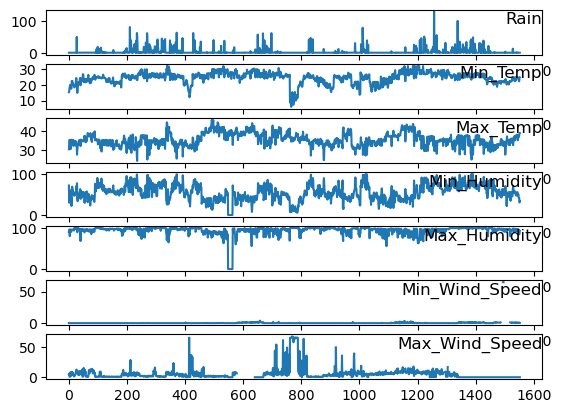

In [90]:

from matplotlib import pyplot

values = df_khammam.values
# specify columns to plot
groups = [0, 1,2, 3, 4, 5, 6]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(df_khammam.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [92]:
#very few unique values
Name_List = ["Rain",  "Min_Temp",  "Max_Temp",  "Min_Humidity",  "Max_Humidity", "Min_Wind_Speed",  "Max_Wind_Speed"]
col_todel=[]
print('Feature name, Number of unique values, Percentage of unique values out of all rows in the dataset')
  
for i in range(df_khammam.shape[1]):
  col=list(df_khammam[Name_List[i]])
  num = np.unique(col).size
  percentage = float(num / df_khammam.shape[0]) * 100
  if percentage < 1:
      col_todel.append(i)
  print('%s, %d, %.1f%%' % (Name_List[i], num, percentage))
print('\n Column to delete', col_todel)
for j in col_todel:
  print('\n Feature to delete', Name_List[j])

Feature name, Number of unique values, Percentage of unique values out of all rows in the dataset
Rain, 207, 13.3%
Min_Temp, 180, 11.6%
Max_Temp, 170, 10.9%
Min_Humidity, 603, 38.8%
Max_Humidity, 219, 14.1%
Min_Wind_Speed, 32, 2.1%
Max_Wind_Speed, 183, 11.8%

 Column to delete []


In [93]:
for i in col_todel:
    df_khammam.drop(Name_List[i], axis=1, inplace=True)
print(df_khammam.shape)

(1553, 7)


In [94]:
df_khammam = df_khammam.drop("Rain", axis=1)

          Min_Temp  Max_Humidity  Min_Humidity  Max_Wind_Speed  Min_Wind_Speed
count  1553.000000   1552.000000   1553.000000     1481.000000     1515.000000
mean     24.594205     93.865077     54.360786        5.681296        0.344488
std       3.623341     11.860800     18.601521       10.254440        2.924014
min       6.000000      0.000000      0.000000        0.000000        0.000000
25%      22.700000     92.500000     42.100000        0.800000        0.000000
50%      24.900000     97.600000     54.600000        3.400000        0.000000
75%      27.000000     99.900000     67.000000        6.700000        0.100000
max      32.300000    100.000000     99.600000       67.400000       65.100000
          Min_Temp  Max_Humidity  Min_Humidity  Max_Wind_Speed  Min_Wind_Speed
count  1071.000000   1070.000000   1071.000000     1060.000000     1033.000000
mean     24.487302     96.250561     57.292437        4.118302        0.008228
std       2.886716      4.306274     16.799733      

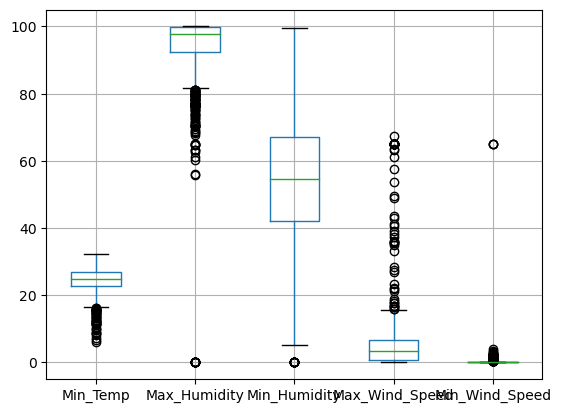

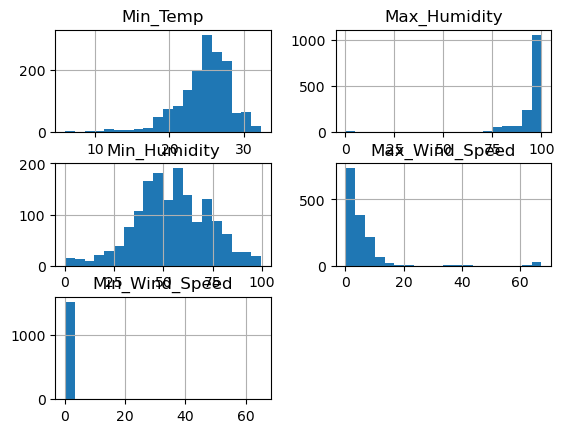

In [95]:
# identify features with outliers
features = [ "Min_Temp", "Max_Humidity", "Min_Humidity", "Max_Wind_Speed", "Min_Wind_Speed"]

# calculate descriptive statistics
print(df_khammam[features].describe())

# create boxplots
df_khammam[features].boxplot()

# create histograms
df_khammam[features].hist(bins=20)

# identify outliers using IQR method
Q1 = df_khammam[features].quantile(0.25)
Q3 = df_khammam[features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_khammam[features] < (Q1 - 1.5 * IQR)) | (df_khammam[features] > (Q3 + 1.5 * IQR))).any(axis=1)

# # remove outliers from DataFrame
df_khammam = df_khammam[~outliers]
print(df_khammam[features].describe())


In [96]:
# prepare data for lstm

from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
values = df_khammam.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.head())
# drop columns we don't want to predict
# reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
# print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)   var1(t)  \
1   0.095541   0.516129   0.315729   0.794594        0.0   0.406452  0.216560   
2   0.216560   0.396313   0.471871   0.794594        0.0   0.406452  0.216560   
3   0.216560   0.336406   0.493685   0.664865        0.0   0.277419  0.216560   
4   0.216560   0.290323   0.547646   0.794594        0.0   0.541935  0.216560   
5   0.216560   0.419355   0.459242   0.627027        0.0   0.154839  0.063694   

    var2(t)   var3(t)   var4(t)  var5(t)   var6(t)  
1  0.396313  0.471871  0.794594      0.0  0.406452  
2  0.336406  0.493685  0.664865      0.0  0.277419  
3  0.290323  0.547646  0.794594      0.0  0.541935  
4  0.419355  0.459242  0.627027      0.0  0.154839  
5  0.423963  0.308840  0.491892      0.0  0.141935  


In [43]:
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

In [99]:

df_khammam=df_khammam.reset_index()

In [45]:
# # Extract additional information from the Date column
# df_khammam["Month"] = pd.to_datetime(df_khammam["Date"]).dt.month
# df_khammam["DayOfWeek"] = pd.to_datetime(df_khammam["Date"]).dt.dayofweek
# df_khammam["DayOfYear"] = pd.to_datetime(df_khammam["Date"]).dt.dayofyear
# df_khammam[["Min_Temp", "Max_Temp", "Min_Humidity", "Max_Humidity", "Min_Wind_Speed", "Max_Wind_Speed", "Month", "DayOfWeek", "DayOfYear"]]

In [100]:
df_khammam.shape

(1071, 9)

In [101]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [102]:
df_khammam.head()

,level_0,index,Date,Min_Temp,Max_Temp,Min_Humidity,Max_Humidity,Min_Wind_Speed,Max_Wind_Speed
0,0,0,2019-03-01,18.1,35.4,39.8,96.2,0.0,6.3
1,1,1,2019-05-01,20.0,32.8,53.4,96.2,0.0,6.3
2,2,2,2019-06-01,20.0,31.5,55.3,93.8,0.0,4.3
3,3,3,2019-07-01,20.0,30.5,60.0,96.2,0.0,8.4
4,4,4,2019-08-01,20.0,33.3,52.3,93.1,0.0,2.4


In [105]:

Maximum_Temperature = df_khammam['Max_Temp']
values = Maximum_Temperature.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [106]:

test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [107]:

import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [108]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
797/797 [==============================] - 27s 29ms/step - loss: 0.0160
Epoch 2/3
797/797 [==============================] - 24s 30ms/step - loss: 0.0107
Epoch 3/3
797/797 [==============================] - 24s 30ms/step - loss: 0.0100


In [110]:

predictions = model.predict(x_test)
print(x_train.shape)
print(x_test.shape)
print(x_test[0])
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

7/7 [==============================] - 1s 27ms/step
(797, 60, 1)
(214, 60, 1)
[[0.3640553 ]
 [0.49308756]
 [0.47926267]
 [0.47926267]
 [0.47926267]
 [0.49308756]
 [0.49308756]
 [0.47926267]
 [0.47926267]
 [0.40092166]
 [0.41474654]
 [0.3640553 ]
 [0.3640553 ]
 [0.3640553 ]
 [0.38248848]
 [0.47926267]
 [0.47004608]
 [0.40092166]
 [0.47004608]
 [0.47004608]
 [0.47926267]
 [0.53456221]
 [0.5437788 ]
 [0.48387097]
 [0.40092166]
 [0.47004608]
 [0.40552995]
 [0.47926267]
 [0.37788018]
 [0.52073733]
 [0.5483871 ]
 [0.49308756]
 [0.37327189]
 [0.47926267]
 [0.50230415]
 [0.52534562]
 [0.52534562]
 [0.47926267]
 [0.47926267]
 [0.47926267]
 [0.59907834]
 [0.58986175]
 [0.47926267]
 [0.59907834]
 [0.66820276]
 [0.62211982]
 [0.7235023 ]
 [0.62672811]
 [0.60368664]
 [0.59907834]
 [0.59907834]
 [0.59907834]
 [0.59907834]
 [0.59907834]
 [0.59447005]
 [0.61751152]
 [0.50230415]
 [0.3640553 ]
 [0.59907834]
 [0.59907834]]


0.01091536940815318

In [111]:
df_khammam['Date'] = pd.to_datetime(df_khammam['Date'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


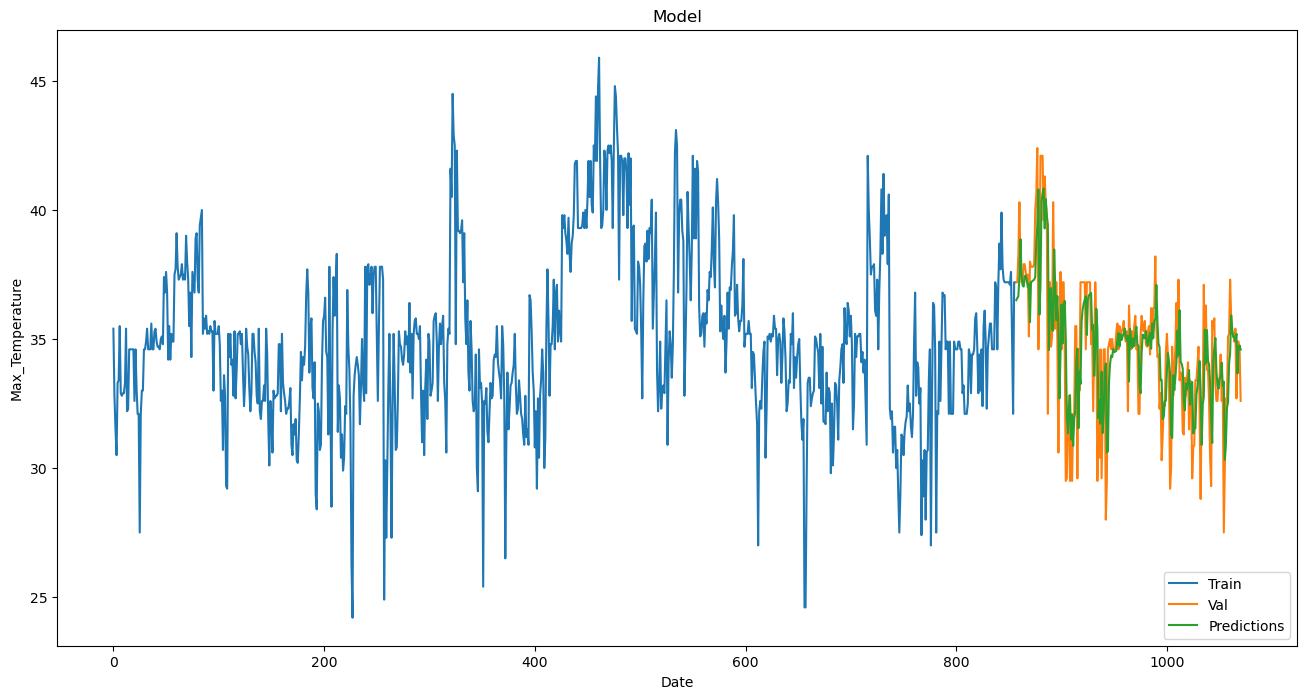

In [112]:

data = df_khammam.filter(['Max_Temp'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Max_Temperature')
plt.plot(train)
plt.plot(validation[['Max_Temp', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()